In [3]:
import numpy as np
import pandas as pd

In [4]:
#Creating a small dataset
data = {
    'Feature' : [1,2,3,4,5,6,7,8,9,10],
    'Target' : [1.2,2.3,3.1,4.8,5.6,6.2,7.5,8.3,9.1,10.4]
}
df = pd.DataFrame(data)

In [8]:
from sklearn.model_selection import train_test_split
#splitting the data into training and testing sets
X = df[['Feature']] # feature column (independent variable)
y = df[['Target']] # Target column (dependent variable)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [9]:
from sklearn.linear_model import LinearRegression
#Training the linear Regression model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [10]:
from sklearn.metrics import mean_absolute_error,r2_score
#Evaluationg the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("Model Preformance:\n")
print(f"Mean Absolute Error (MAE): {mae}\n")
print(f"R\u00B2 score: {r2}")

Model Preformance:

Mean Absolute Error (MAE): 0.1874999999999991

R² score: 0.9951335366016729


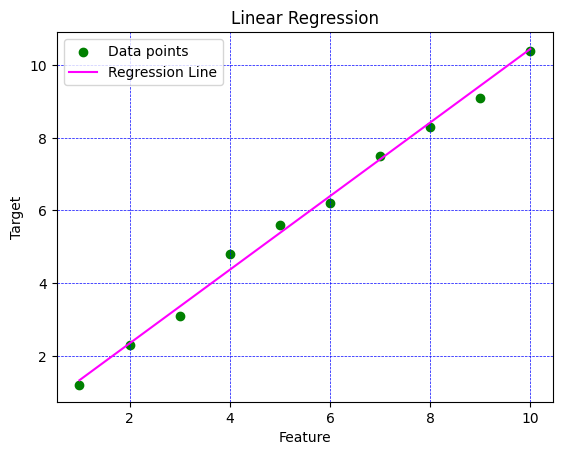

In [15]:
import matplotlib.pyplot as plt
#visualizing the regression line
plt.scatter(X,y, color='green', label='Data points')
plt.plot(X, model.predict(X), color = 'magenta', label = 'Regression Line')
plt.title('Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.grid(color = 'blue', linestyle='--', linewidth = 0.5)
plt.legend()
plt.show()

In [17]:
import pickle
#save the trained model
pickle.dump(model, open("model.pkl", "wb"))

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import pickle

#Load the trained model
model = pickle.load(open("model.pkl", "rb"))

#sreamlit app
st.title("Normal Model")
st.write("Predit the value based on trained model")

#User inputs
user_input = st.number_input("Your Input")

if st.button("Predict"):
    #Prepare features
    features = ([[user_input]])
    
    #Make Predictions
    prediction = model.predict(features)
    st.write(f"Predicted Value: {prediction[0]}")

    

In [ ]:
!streamlit run app.py & npx localtunnel port --8500